In [19]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"D:\my projects\project-3\covid_data_2020-2021.csv")

In [3]:
data.head(10)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
1,2021-10-11,0,0,0,0,0,Negative,Yes,male,Other
2,2021-10-11,0,0,0,0,0,Negative,No,female,Other
3,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
4,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
5,2021-10-11,0,0,0,0,0,Negative,No,female,Other
6,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
7,2021-10-11,0,0,0,0,0,Negative,No,female,Other
8,2021-10-11,0,0,0,0,0,Negative,No,female,Other
9,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other


In [4]:
data.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication'],
      dtype='object')

In [5]:
data.shape

(5861480, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5861480 entries, 0 to 5861479
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 447.2+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cough,5861480.0,0.046765,0.211135,0.0,0.0,0.0,0.0,1.0
fever,5861480.0,0.039094,0.193818,0.0,0.0,0.0,0.0,1.0
sore_throat,5861480.0,0.018917,0.136233,0.0,0.0,0.0,0.0,1.0
shortness_of_breath,5861480.0,0.004553,0.067320,0.0,0.0,0.0,0.0,1.0
head_ache,5861480.0,0.039237,0.194158,0.0,0.0,0.0,0.0,1.0


In [8]:
data.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [20]:
#  filling missing values 

data['gender'].fillna('Unknown', inplace=True)
data['age_60_and_above'].fillna('Unknown', inplace=True)
data['test_indication'].fillna('Unknown', inplace=True)

In [10]:
data.dropna(subset=['corona_result'], inplace=True)

In [11]:
data['test_date'] = pd.to_datetime(data['test_date'])

In [12]:
data['year'] = data['test_date'].dt.year
data['month'] = data['test_date'].dt.month
data['day'] = data['test_date'].dt.day

### Target variable Distribution

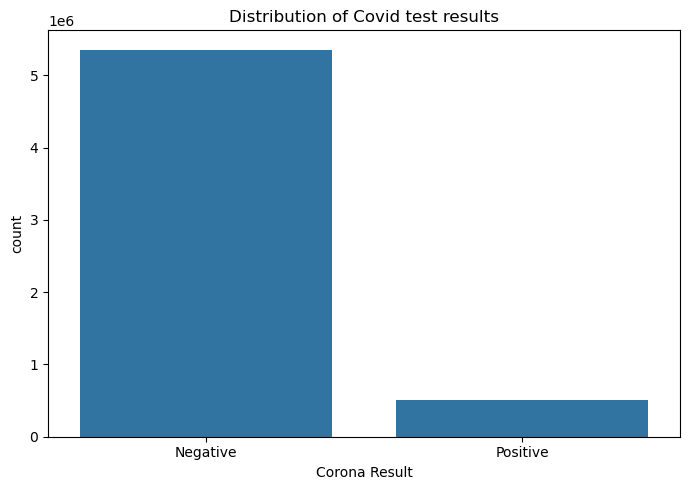

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(data=data, x='corona_result')
plt.title('Distribution of Covid test results')
plt.xlabel('Corona Result')
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [14]:
symptom_cols = ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache']

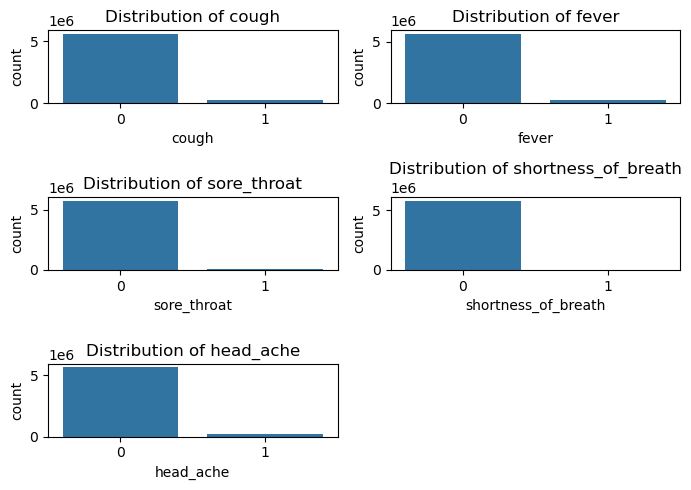

In [15]:
t=1
plt.figure(figsize=(7,5))
for i in symptom_cols:
    plt.subplot(3,2,t)
    sns.countplot(x=i, data=data)
    plt.title(f'Distribution of {i}')
    t+=1
    
plt.tight_layout()
plt.show()

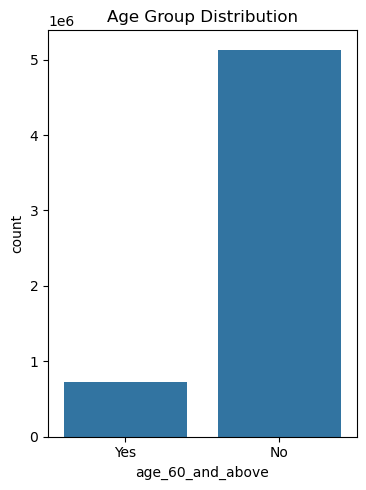

In [16]:
# Age vs data

plt.figure(figsize=(7,5))

plt.subplot(1,2,1)
sns.countplot(x='age_60_and_above', data=data)
plt.title('Age Group Distribution')

plt.tight_layout()
plt.show()

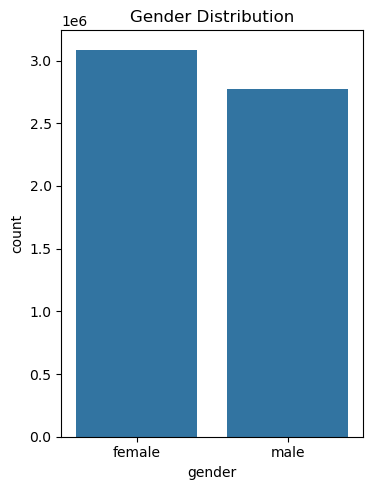

In [17]:
# gender vs data 

plt.figure(figsize=(7,5))

plt.subplot(1,2,2)
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

### Bivariate Analysis

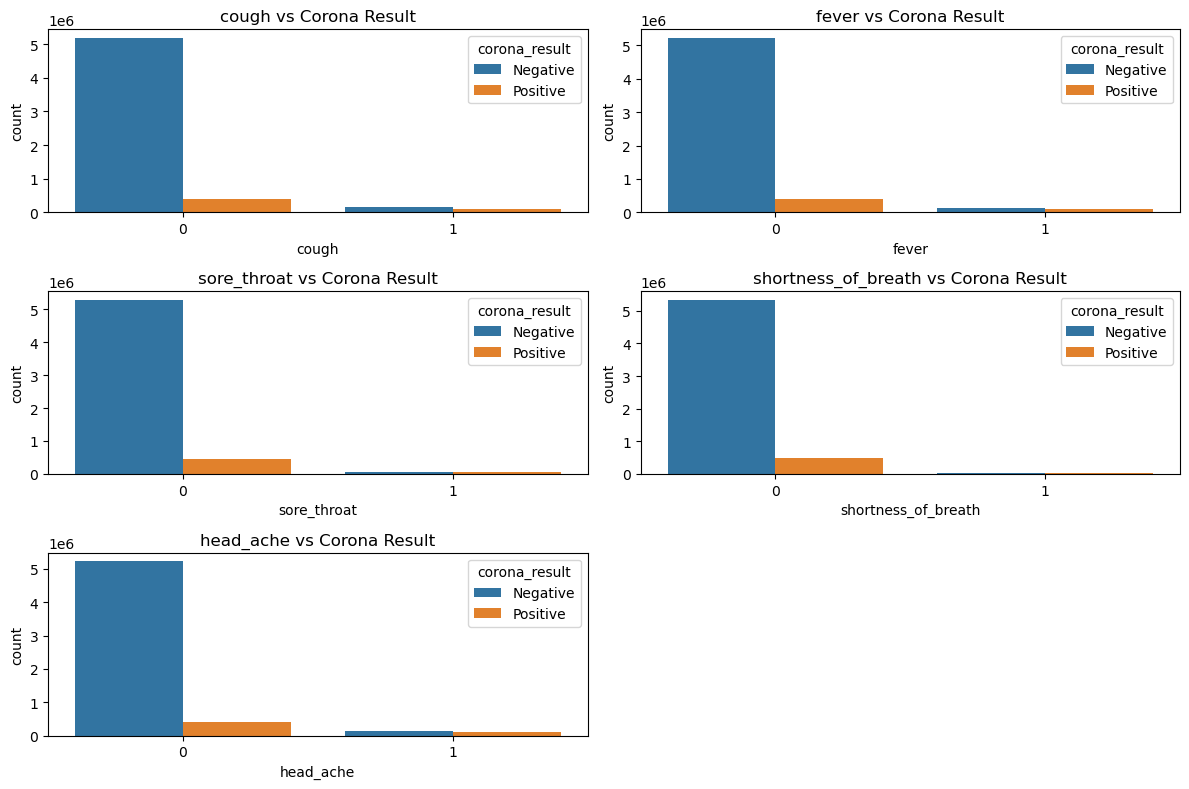

In [18]:
t=1
plt.figure(figsize=(12,8))

for i in symptom_cols:
    plt.subplot(3,2,t)
    sns.countplot(x=i, hue='corona_result', data=data)
    plt.title(f'{i} vs Corona Result')
    t+=1
    
plt.tight_layout()
plt.show()